In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
new_model = keras.models.load_model('C:/Users/myson/my_model4.h5')
new_model.summary()


l=os.listdir('C:/Users/myson/0504cutdata/images')


C:\Users\myson\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 96, 96, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 32)        0 

In [2]:
print(len(l))

2000


In [8]:
import cv2
num=len(l)
images=[]
bgrimg=[]

for element in l :
    p1=os.path.join('C:/Users/myson/0504cutdata/images/',element)
    img=cv2.imread(p1) 
    img = cv2.resize(img,(96,96))
    bgrimg.append(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    images.append(img)


In [10]:
images= np.array(images,dtype = 'float')
print(images.shape)
images_dim=np.expand_dims(images, axis=4)
points= new_model.predict(images_dim)
print(points)

(2000, 96, 96)


C:\Users\myson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


[[63.200935 36.589775 29.659859 ... 73.09622  47.43507  73.30249 ]
 [65.76673  37.656464 29.90661  ... 76.62425  48.353077 76.21711 ]
 [61.258755 34.840397 28.155628 ... 69.73926  44.87385  70.90242 ]
 ...
 [64.33327  36.880596 29.370037 ... 73.30924  46.410362 74.148506]
 [63.695015 36.922905 29.798758 ... 72.98944  46.486168 72.97983 ]
 [63.82825  37.05009  29.75301  ... 72.812645 46.54616  73.621666]]


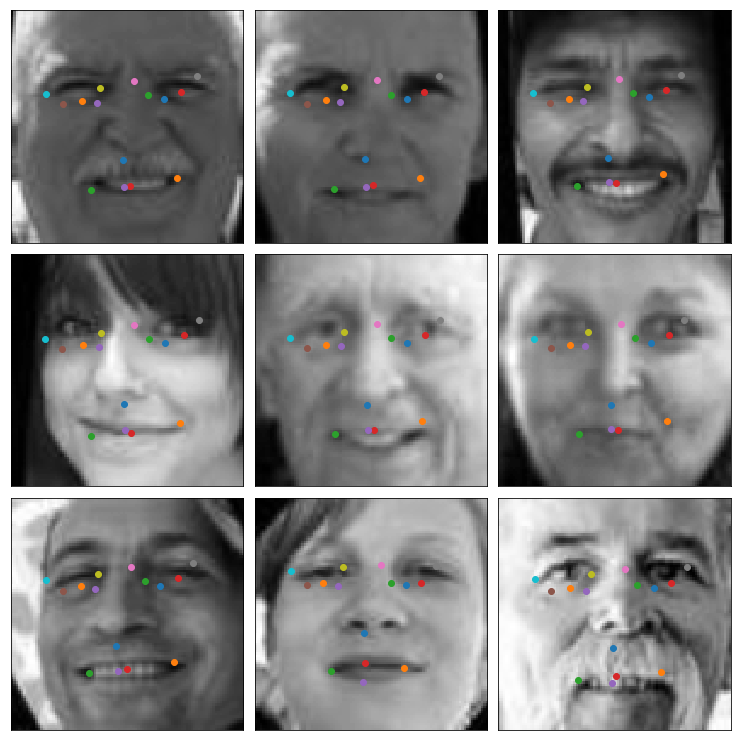

In [11]:

fig = plt.figure(figsize=(10,10))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10,19):
    ax = fig.add_subplot(3, 3, i - 9, xticks=[], yticks=[])
    ax.imshow(images[i], cmap='gray')
    for p in range(0, 30,2):
          ax.scatter( points[i][p],points[i][p+1],marker='o')


In [3]:
#img2 size:(64,64,3)  y2 size  (30)
def cutimg(img2,y2):

    resize_img=cv2.resize(img2,(96,96))
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1, 5, 1, xticks=[], yticks=[])

    x1=int(y2[18])-5
    x2=int(y2[16])+5
    t=int((x2-x1)/2)
    y=(y2[17]+y2[19])/2
    y=int(y)
    left_eye= resize_img[max(0,y-t):min(96,y+t),x1:x2]
    left_eye=cv2.resize(left_eye,(64,64))
    ax.set_title('Left Eye')
    ax.imshow(left_eye)



    ax = fig.add_subplot(1, 5, 2, xticks=[], yticks=[])
    x1=int(y2[12])-5
    x2=int(y2[14])+5
    t=int((x2-x1)/2)
    y=(y2[13]+y2[15])/2
    y=int(y)


    resize_img=cv2.resize(img2,(96,96))
    right_eye= resize_img[max(0,y-t):min(96,y+t),x1:x2]
    right_eye=cv2.resize(right_eye,(64,64))
    ax.set_title('Right Eye')
    ax.imshow(right_eye)



    ax = fig.add_subplot(1, 5, 3, xticks=[], yticks=[])
    x=int(y2[20]/2)
    y=int(y2[21]/2)
    Nose= resize_img[y:min(y+48,96),x:min(x+48,96)]
    Nose=cv2.resize(Nose,(64,64))
    ax.set_title('Nose')
    ax.imshow(Nose)

    ax = fig.add_subplot(1, 5, 4, xticks=[], yticks=[])
    t=int(y2[20])

    left_mouse= resize_img[t-10:96,:t+10]
    left_mouse=cv2.resize(left_mouse,(64,64))
    ax.set_title('Left mouse')
    ax.imshow(left_mouse)



    ax = fig.add_subplot(1, 5, 5, xticks=[], yticks=[])
    t=int(y2[20]) -10

    right_mouse= resize_img[t:96,t:96]
    right_mouse=cv2.resize(right_mouse,(64,64))
    ax.set_title('Right mouse')
    ax.imshow(right_mouse)

cutimg(bgrimg[55],points[55])

NameError: name 'bgrimg' is not defined

In [62]:
#cv2.imwrite('C:/Users/myson/0504cutdata/1/i.jpg',bgrimg[2])

In [7]:
print(points)
for index,img in  enumerate(bgrimg):
    resize_img=cv2.resize(img,(96,96))
   
    x1=int(points[index][18])-5
    x2=int(points[index][16])+5
    t=int((x2-x1)/2)
    y=(points[index][17]+points[index][19])/2
    y=int(y)
   # left_eye= resize_img[max(0,y-t):min(96,y+t),x1:x2]
    #left_eye=cv2.resize(left_eye,(64,64))
    print(index,x1,x2,y)
    
## 원래 모델예측결고 이용해 부위별로 자르고 64*64*3으로 저장할려고 함
# 모델이 같은값을 뱉음-> epoch를 줄이거나, 모델을 바꿔보기



[[69.45858  36.89083  31.106983 ... 75.38878  50.156193 78.11404 ]
 [68.33298  36.518497 31.293367 ... 73.81738  50.603363 75.72827 ]
 [68.30805  36.541218 30.05308  ... 77.50895  48.927307 79.233154]
 ...
 [68.08279  36.92043  27.054174 ... 75.444885 45.104794 82.781075]
 [68.19762  37.209576 29.750372 ... 76.155136 48.320614 77.960175]
 [67.91393  35.40649  29.909899 ... 73.68506  49.41363  75.47107 ]]
0 9 44 32
1 10 44 32
2 9 44 33
3 8 42 31
4 9 43 32
5 8 42 32
6 10 45 33
7 9 43 33
8 7 42 33
9 7 42 32
10 9 43 31
11 9 42 31
12 10 44 32
13 9 42 34
14 9 42 33
15 9 42 33
16 10 43 32
17 10 42 31
18 9 44 31
19 9 43 31
20 9 43 32
21 9 42 31
22 10 43 31
23 9 43 32
24 9 43 32
25 8 43 33
26 8 42 31
27 9 44 31
28 10 43 31
29 9 42 31
30 9 43 32
31 8 43 32
32 9 43 31
33 9 43 32
34 9 43 31
35 9 43 33
36 8 41 31
37 9 43 31
38 8 43 32
39 9 43 32
40 9 44 32
41 10 43 32
42 7 42 31
43 9 43 31
44 9 43 32
45 9 43 33
46 9 42 31
47 9 42 33
48 9 42 33
49 9 43 32
50 9 42 33
51 9 43 32
52 9 42 32
53 9 42 33


847 9 43 33
848 9 43 34
849 8 43 32
850 9 43 33
851 8 43 33
852 8 42 32
853 9 42 32
854 9 43 31
855 9 43 31
856 9 44 31
857 8 42 31
858 9 42 31
859 8 41 28
860 8 42 31
861 9 43 32
862 8 42 30
863 9 43 32
864 9 44 32
865 9 43 34
866 8 43 31
867 9 43 31
868 9 43 33
869 8 42 31
870 8 43 29
871 9 43 30
872 9 43 33
873 8 43 32
874 8 43 31
875 8 44 31
876 9 44 31
877 9 44 32
878 8 41 31
879 8 42 32
880 10 44 33
881 8 43 31
882 9 43 32
883 9 43 32
884 9 43 32
885 8 42 32
886 9 42 33
887 9 42 30
888 8 42 31
889 9 42 31
890 9 43 31
891 9 43 32
892 8 43 32
893 9 43 33
894 9 43 33
895 9 43 32
896 9 43 33
897 8 42 32
898 9 43 32
899 9 43 33
900 9 43 33
901 9 43 32
902 10 44 33
903 10 44 31
904 9 43 33
905 9 43 33
906 9 43 32
907 8 42 33
908 8 43 32
909 9 44 31
910 9 42 33
911 9 43 34
912 9 43 30
913 8 43 31
914 8 43 31
915 8 43 33
916 9 42 33
917 10 43 32
918 9 44 32
919 8 44 32
920 9 42 33
921 9 42 31
922 10 43 33
923 9 42 31
924 9 43 32
925 9 43 32
926 9 42 32
927 8 43 31
928 9 42 33
929 9 43 34

1651 9 42 31
1652 8 42 33
1653 9 43 30
1654 9 44 33
1655 8 42 32
1656 10 43 32
1657 9 42 29
1658 8 43 29
1659 9 42 30
1660 8 43 33
1661 8 41 32
1662 8 43 32
1663 8 42 30
1664 9 43 31
1665 9 42 32
1666 9 43 31
1667 9 43 32
1668 9 43 31
1669 9 42 29
1670 9 42 32
1671 8 42 32
1672 8 43 31
1673 9 42 31
1674 9 43 33
1675 9 43 33
1676 8 42 31
1677 9 43 33
1678 9 44 30
1679 9 42 30
1680 8 42 32
1681 9 43 29
1682 8 41 30
1683 10 43 32
1684 9 44 33
1685 9 43 30
1686 10 42 31
1687 9 43 31
1688 10 43 32
1689 9 42 31
1690 9 44 32
1691 9 42 31
1692 8 42 32
1693 8 42 31
1694 10 42 31
1695 9 43 32
1696 8 42 31
1697 8 42 30
1698 9 42 31
1699 8 42 31
1700 9 43 31
1701 10 44 31
1702 9 43 32
1703 9 43 32
1704 9 43 33
1705 9 42 31
1706 9 44 31
1707 9 43 30
1708 9 43 32
1709 8 42 31
1710 9 43 31
1711 9 42 31
1712 9 43 32
1713 9 42 31
1714 9 43 32
1715 8 43 32
1716 9 43 31
1717 9 43 27
1718 9 43 32
1719 9 43 32
1720 10 43 31
1721 8 43 32
1722 9 43 33
1723 10 44 33
1724 9 43 30
1725 9 43 31
1726 9 43 33
1727

Number of faces detected: 1


C:\Users\myson\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


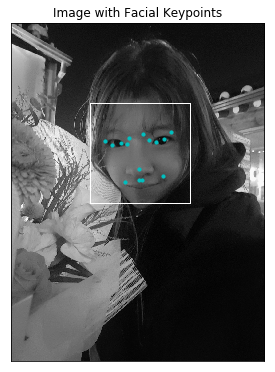

In [14]:
# Use the face detection code with our trained conv-net
import cv2
def plot_keypoints2(img, face_cascade_path, model_path, scale=1.2, neighbors=5, key_size=10):
    
    face_cascade=cv2.CascadeClassifier(face_cascade_path) 

    img = np.uint8(img)
    faces = face_cascade.detectMultiScale(img, scale, neighbors)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(121, xticks=[], yticks=[])
    ax.set_title('Image with Facial Keypoints')

    # Print the number of faces detected in the image
    print('Number of faces detected:', len(faces))

    # Make a copy of the orginal image to draw face detections on
    image_with_detections = np.copy(img)
    # Get the bounding box for each detected face
    for (x,y,w,h) in faces:
        # Add a red bounding box to the detections image
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
        gray_crop = image_with_detections[y:y+h, x:x+w]
       
        orig_shape_crop = gray_crop.shape
        
        resize_gray_crop = cv2.resize(gray_crop, (96, 96)) / 255
        model = keras.models.load_model(model_path)
        landmarks = np.squeeze(model.predict(
            np.expand_dims(np.expand_dims(resize_gray_crop, axis=4),  axis=0)))
        
        ax.scatter((landmarks[0::2] *orig_shape_crop[0]/96)+x, 
                   (landmarks[1::2] *orig_shape_crop[1]/96)+y, 
                   marker='o', c='c', s=key_size)
    ax.imshow(image_with_detections, cmap='gray')


img_path='i1.jpg'
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
obamas = plot_keypoints2(gray_img,
                        'haarcascade_frontalface_default.xml',
                        'my_model4.h5')